In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
print(x_train.shape)
print(x_test.shape )

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(25000,)
(25000,)


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
x_train = pad_sequences(x_train, maxlen = 200);
x_test = pad_sequences(x_test, maxlen = 200)

In [6]:
import numpy as np


In [7]:
x_train = np.asarray(x_train).astype("float32")

x_test = np.asarray(x_test).astype("float32")


In [8]:
import keras

In [9]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5036 - loss: 202.2245 - val_accuracy: 0.4926 - val_loss: 87.9972
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 69.1976 - val_accuracy: 0.4928 - val_loss: 39.4486
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5075 - loss: 29.0976 - val_accuracy: 0.4918 - val_loss: 14.4833
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 10.2086 - val_accuracy: 0.4958 - val_loss: 6.9846
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5179 - loss: 5.4133 - val_accuracy: 0.4984 - val_loss: 4.4810
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 3.4636 - val_accuracy: 0.4934 - val_loss: 3.3740
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5036 - loss: 2.4962 - val_accuracy: 0.5016 - val_loss: 2.7060
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5068 - loss: 2.0795 - val_accuracy: 0

In [12]:
dict_data = history.history

In [13]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [14]:
import matplotlib.pyplot as plt

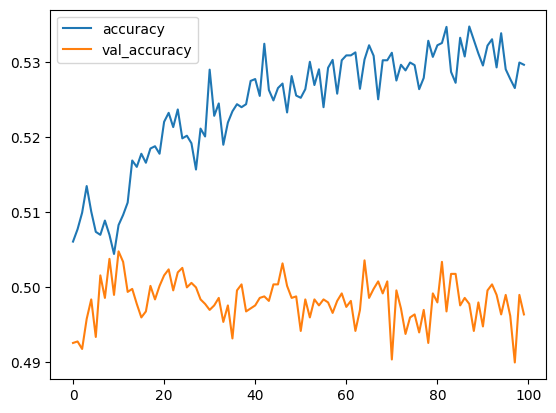

In [15]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']


plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.legend()
plt.show()

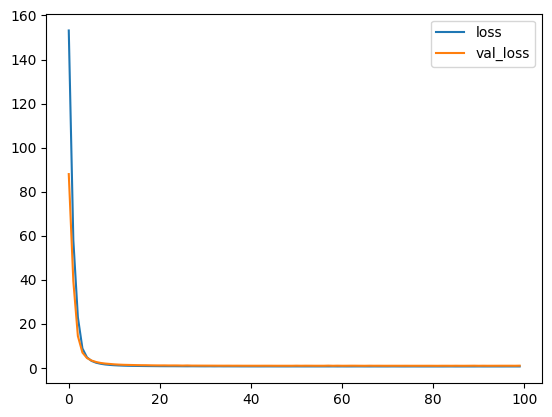

In [16]:
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

def predict_review(review, model, tokenizer, max_len=200):
    """
    Predict the sentiment of a review.

    Args:
        review (str): The input review as a string.
        model (keras.Model): The trained model.
        tokenizer (Tokenizer): The tokenizer for the IMDB dataset.
        max_len (int): Maximum length for padding sequences.

    Returns:
        str: "Positive" or "Negative" based on the prediction.
    """
    # Tokenize and convert the review to sequences
    review_seq = tokenizer.texts_to_sequences([review])
    # Pad the sequence
    review_seq_padded = pad_sequences(review_seq, maxlen=max_len)
    # Predict the sentiment
    prediction = model.predict(review_seq_padded)
    # Return the result
    return "Positive" if prediction[0] > 0.5 else "Negative"

# Example usage:
# Create the IMDB tokenizer (this is based on the IMDB dataset used earlier)
imdb_tokenizer = Tokenizer(num_words=10000)
imdb_tokenizer.fit_on_texts([''])  # Initialize tokenizer for IMDB dataset

# Replace this with the actual review you want to predict
example_review = "This movie was fantastic! The acting was superb and the story was gripping."

# Predict the sentiment
result = predict_review(example_review, model, imdb_tokenizer)
print(f"The review sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The review sentiment is: Positive
